There are some fairly major discrepancies between the Bronselaer product and my attempted replication, particularly at the low latitudes, which Ben has suggested may be explained by some profiles he removed manually from the GLODAP dataset as they failed a visual/manual QC. 

Here I will dump GLODAP linearly interpolated profiles from different latitude bands, to see if any obviously erroneous profiles have been included in the analysis. The discrepancies are more obvious in the temperature and salt anomalies, so those will be plotted and inspected.

Basically, some of these differences (specifically some especially warm Ruth GLODAP grids in the low latitudes, or some especially cool Ruth SOCCOM grids in the low latitudes) should be able to be explained away...

I've circled the suspected culprit region...
![.](glodap_comparison_BR.png)
![.](soccom_comparison_BR.png)


## result: can't see anything that should have been removed


In [2]:
import xarray as xr
import dask.array
import numpy as np
import pandas as pd
## plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as pcm
import cartopy.crs as ccrs
import cartopy.feature
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as col
import sys
sys.path.append('/home/Ruth.Moorman/')
### import required python functions
from masking import *
from SOCCOM_GLODAP_processing import *
import cmocean.cm as cm
import scipy.io
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from matplotlib import rc, rcParams
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import nclcmaps

In [96]:
float_dir = '/work/Ruth.Moorman/GLODAP/processed_GLODAP/'
GLODAP_TEMP_PROFILES = xr.open_dataset(float_dir+'ALL_PROFILES_TEMPERATURE-vertically-interpolated-QC.nc')
GLODAP_SALT_PROFILES = xr.open_dataset(float_dir+'ALL_PROFILES_SALINITY-vertically-interpolated-QC.nc')
float_dir = '/work/Ruth.Moorman/SOCCOM-floats/LR_SOCCOM_20200308/processed_SOCCOM/'
SOCCOM_TEMP_PROFILES = xr.open_dataset(float_dir+'ALL_FLOATS_TEMPERATURE-vertically-interpolated-QC.nc')
SOCCOM_SALT_PROFILES = xr.open_dataset(float_dir+'ALL_FLOATS_SALINITY-vertically-interpolated-QC.nc')

In [97]:
GLODAP_TEMP_PROFILES = GLODAP_TEMP_PROFILES.linear
GLODAP_SALT_PROFILES = GLODAP_SALT_PROFILES.linear
SOCCOM_TEMP_PROFILES = SOCCOM_TEMP_PROFILES.linear
SOCCOM_SALT_PROFILES = SOCCOM_SALT_PROFILES.linear

In [68]:
lon_bounds = np.arange(0,361,8)
lat_bounds = np.arange(-30,-91,-3) # start from the lowest latitude bin

In [99]:
# check the circled region specifically?
i = 0
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-30
-33


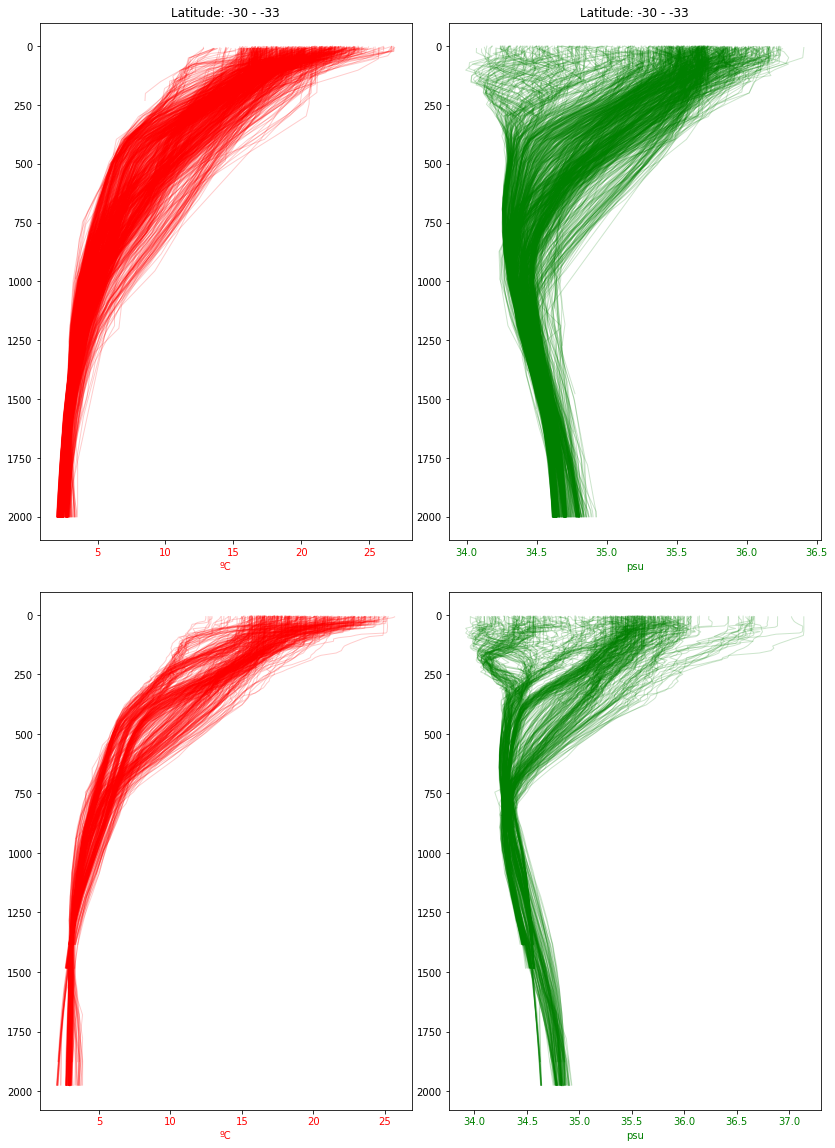

In [103]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -30 - -33')
ax1.set_title('Latitude: -30 - -33')
plt.show()

In [104]:
# check the circled region specifically?
i = 1
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-33
-36


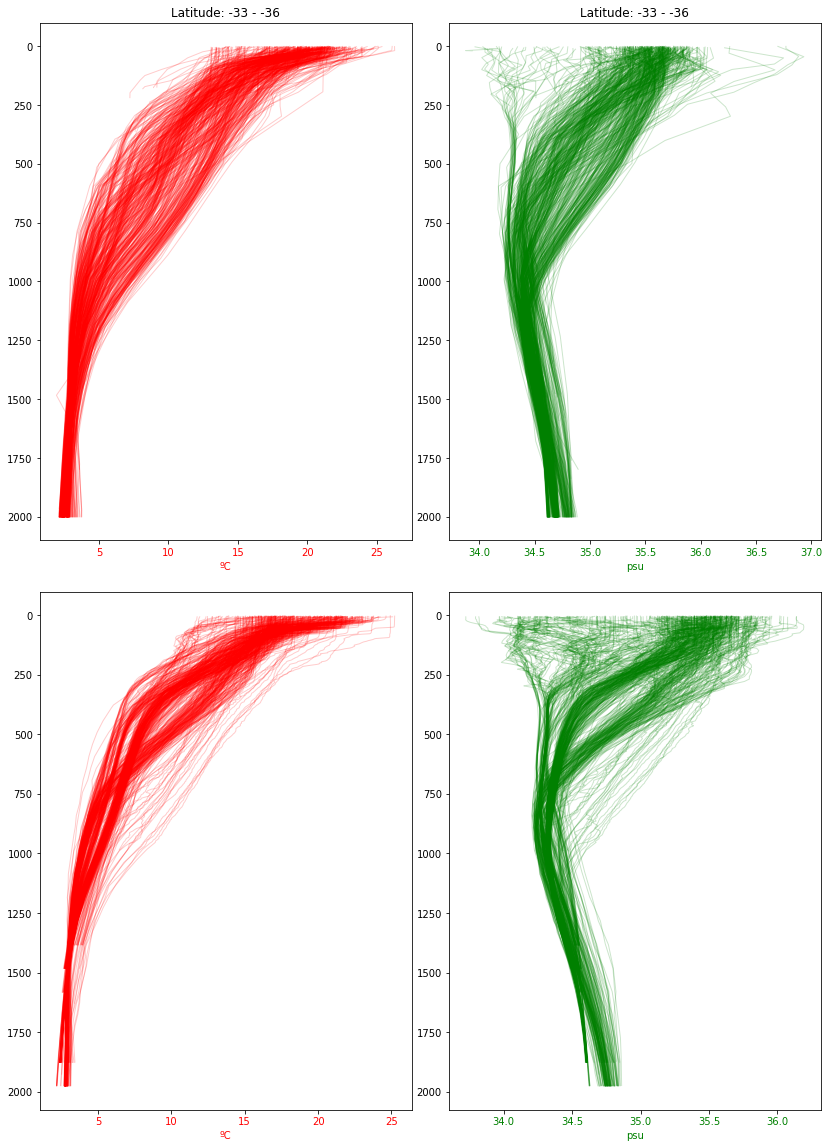

In [105]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -33 - -36')
ax1.set_title('Latitude: -33 - -36')
plt.show()

In [107]:
# check the circled region specifically?
i = 2
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-36
-39


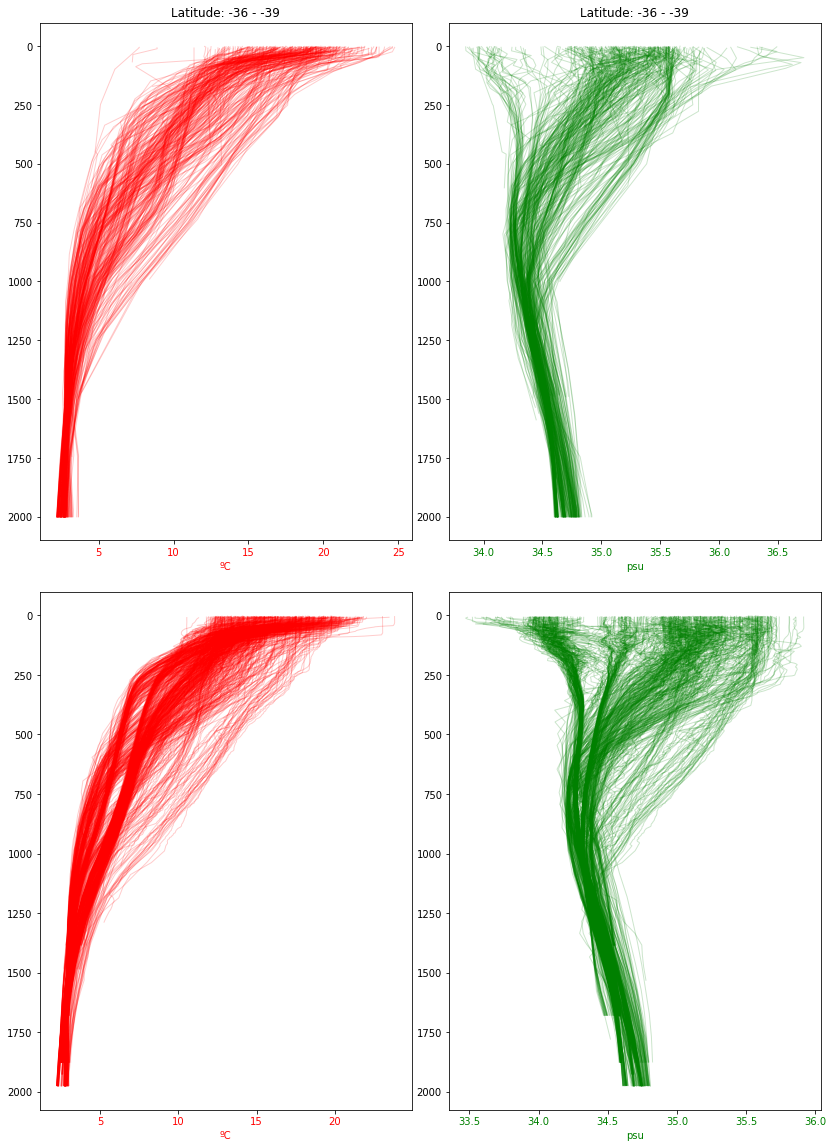

In [108]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -36 - -39')
ax1.set_title('Latitude: -36 - -39')
plt.show()

In [109]:
# check the circled region specifically?
i = 3
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-39
-42


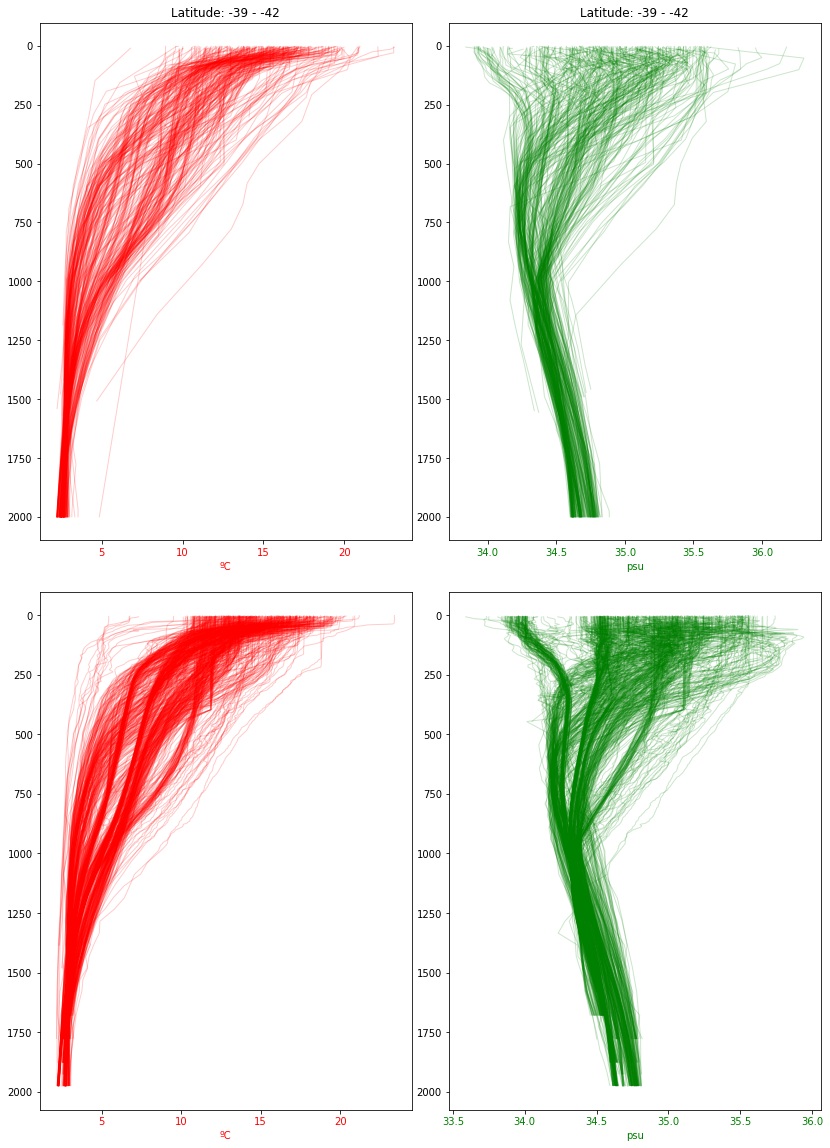

In [110]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -39 - -42')
ax1.set_title('Latitude: -39 - -42')
plt.show()

In [111]:
# check the circled region specifically?
i = 4
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-42
-45


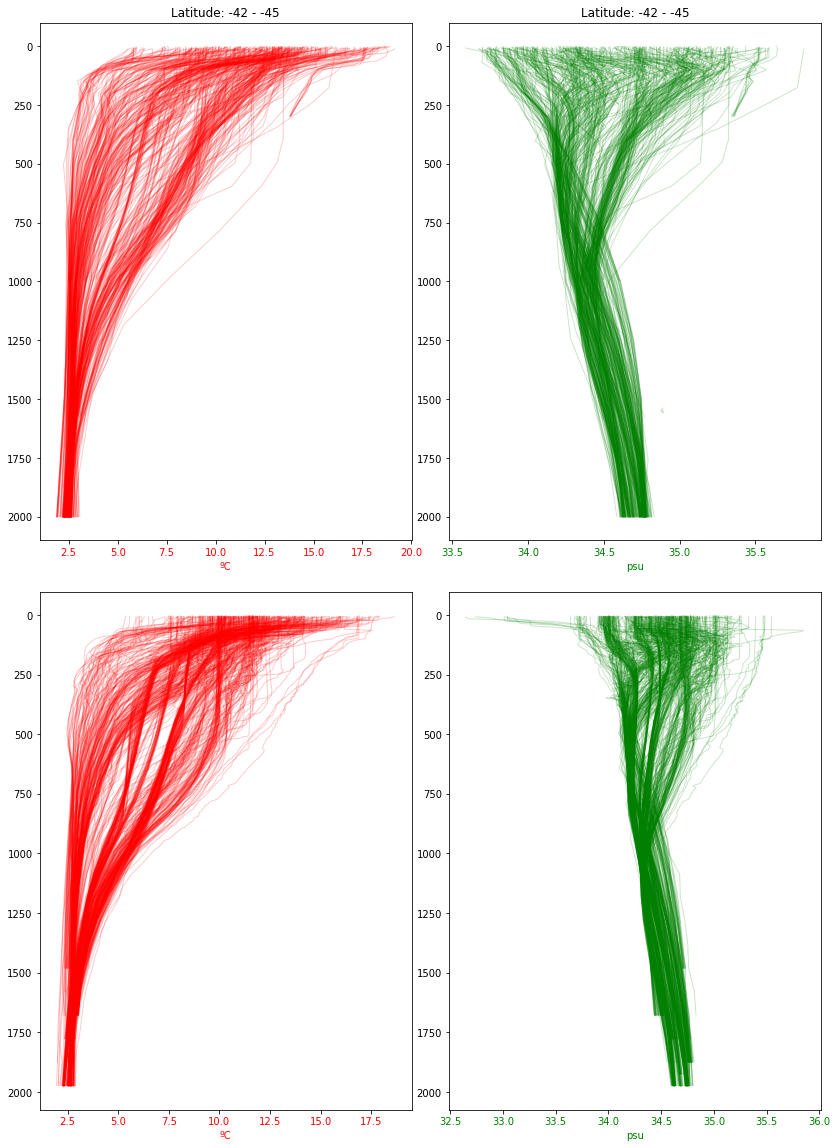

In [112]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -42 - -45')
ax1.set_title('Latitude: -42 - -45')
plt.show()

In [113]:
# check the circled region specifically?
i = 5
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-45
-48


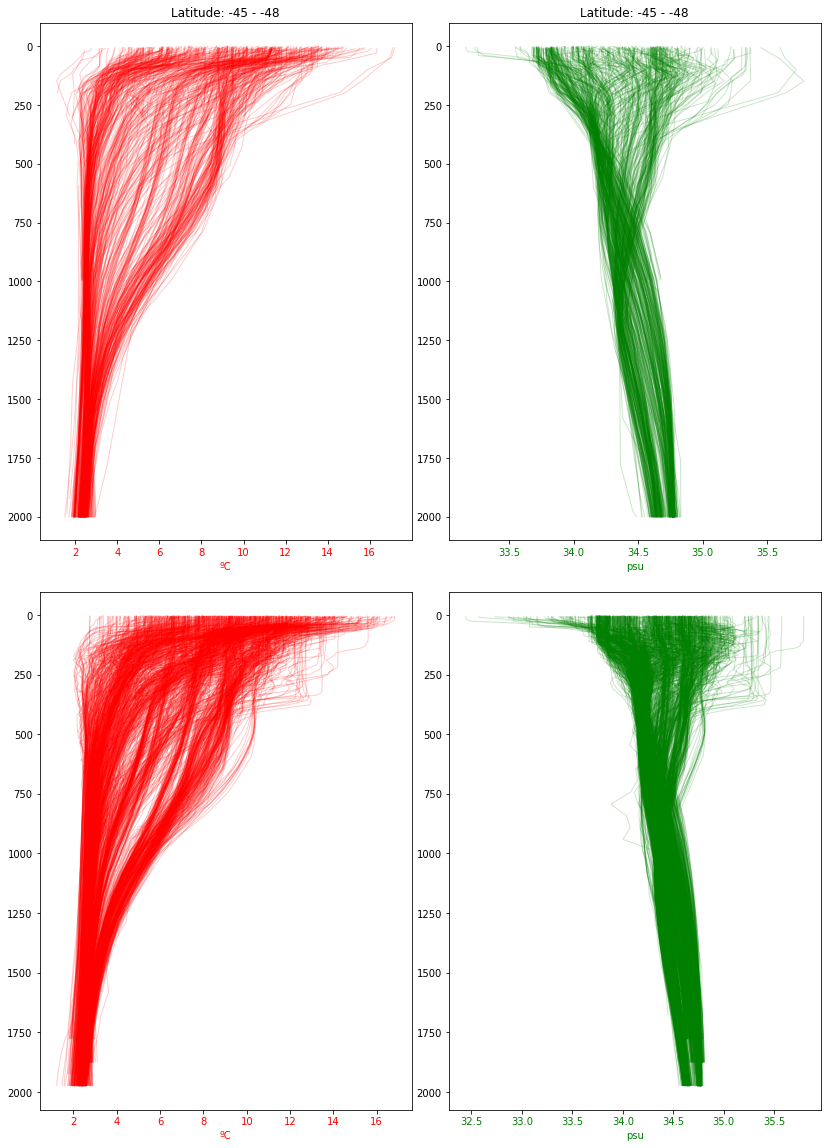

In [114]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -45 - -48')
ax1.set_title('Latitude: -45 - -48')
plt.show()

In [115]:
# check the circled region specifically?
i = 6
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-48
-51


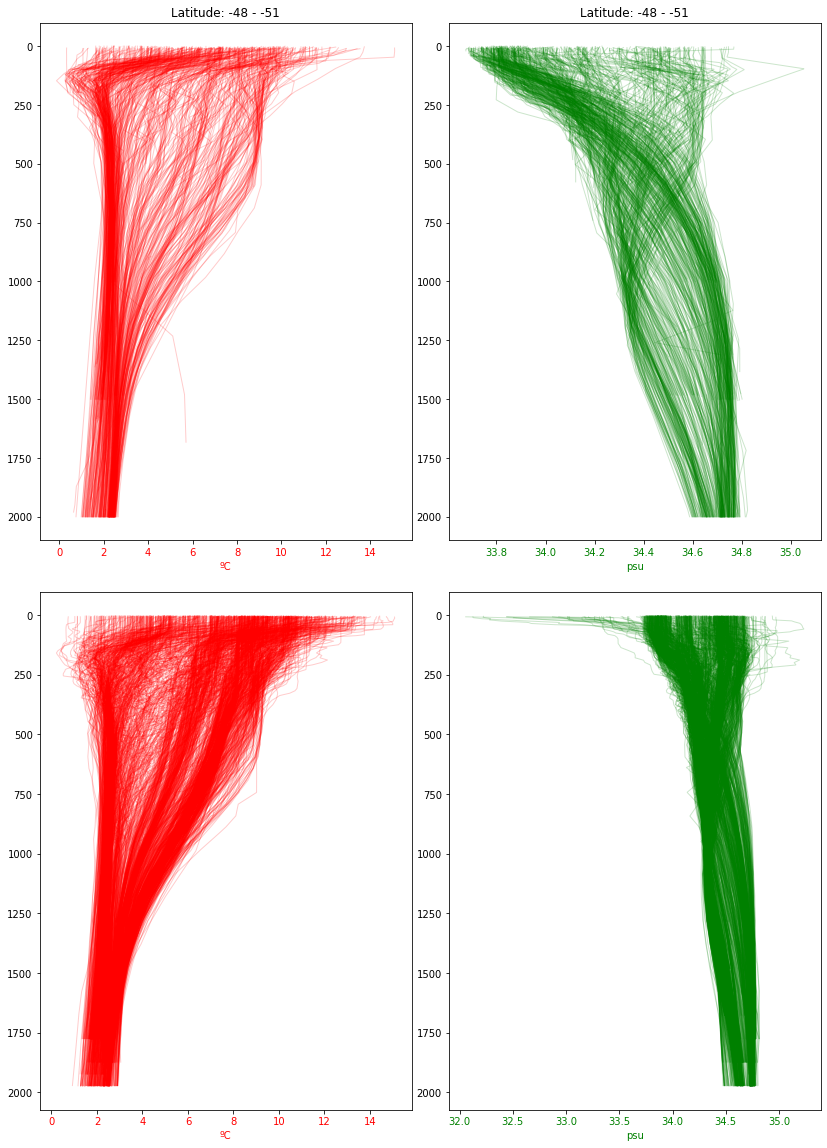

In [116]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -48 - -51')
ax1.set_title('Latitude: -48 - -51')
plt.show()

In [117]:
# check the circled region specifically?
i = 7
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-51
-54


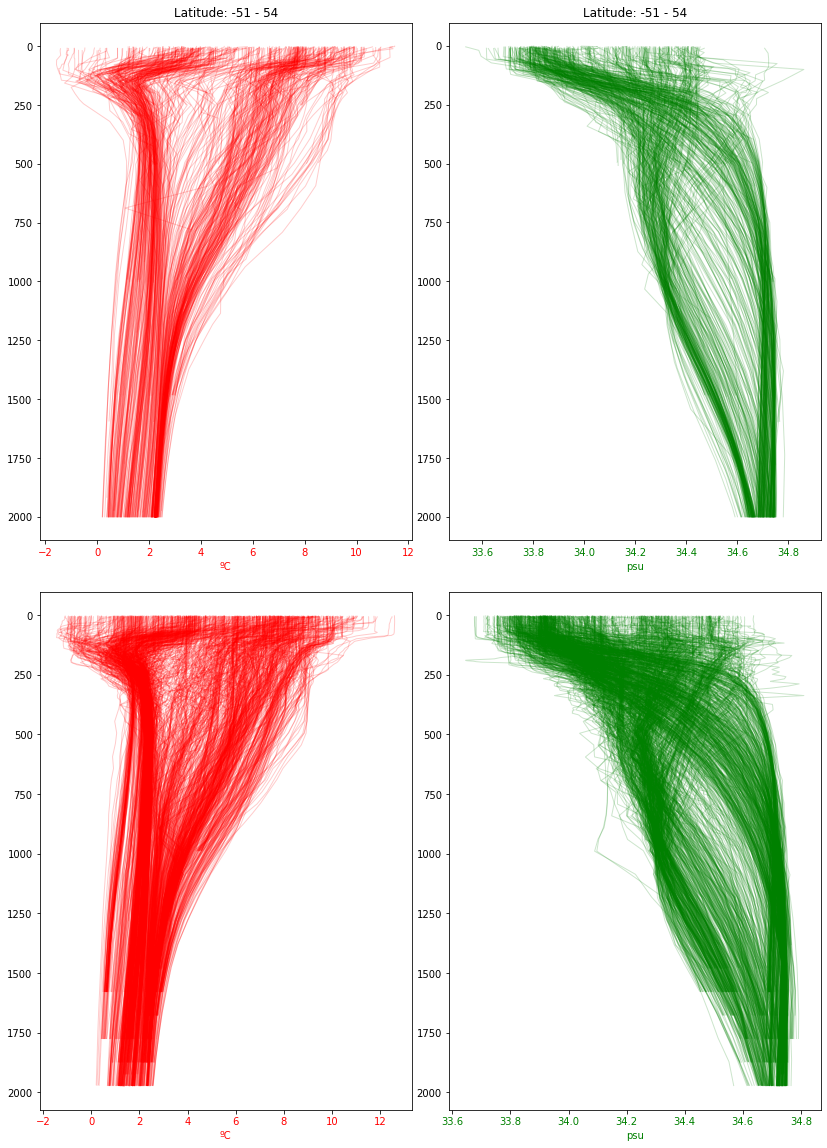

In [118]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -51 - 54')
ax1.set_title('Latitude: -51 - 54')
plt.show()

In [119]:
# check the circled region specifically?
i = 8
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-54
-57


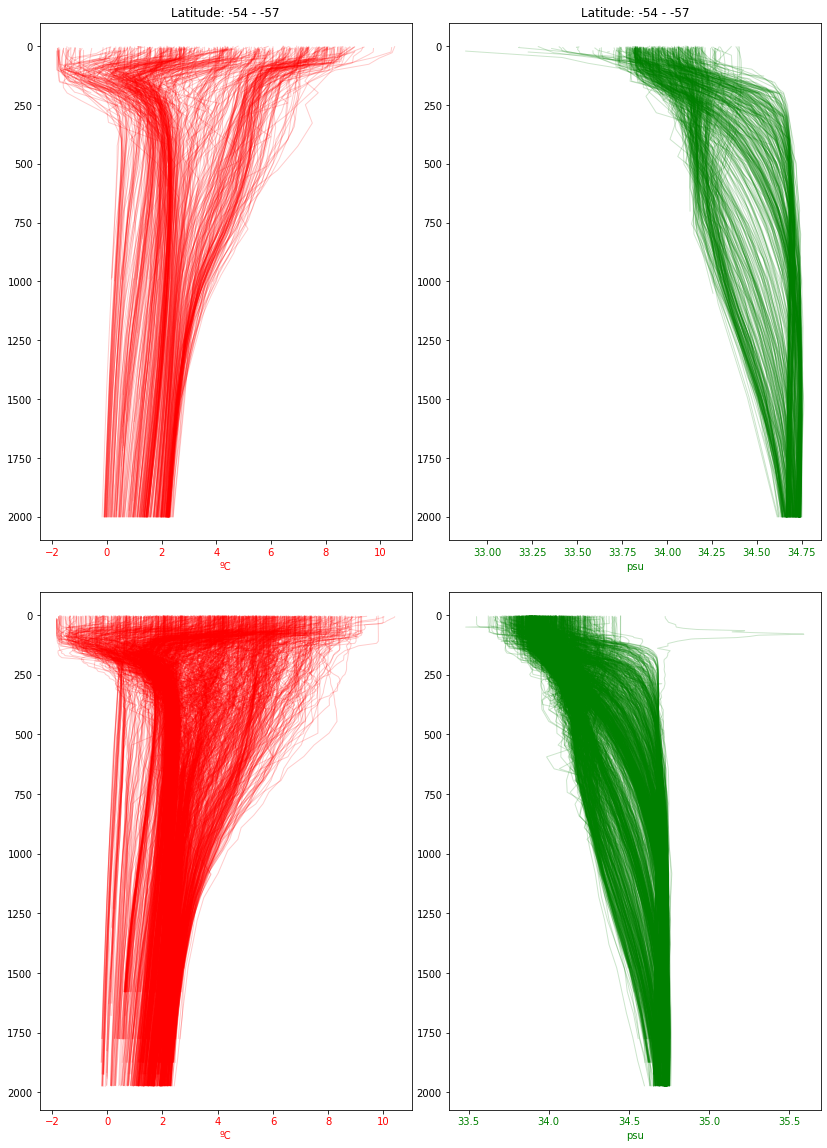

In [120]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -54 - -57')
ax1.set_title('Latitude: -54 - -57')
plt.show()

In [121]:
# check the circled region specifically?
i = 9
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-57
-60


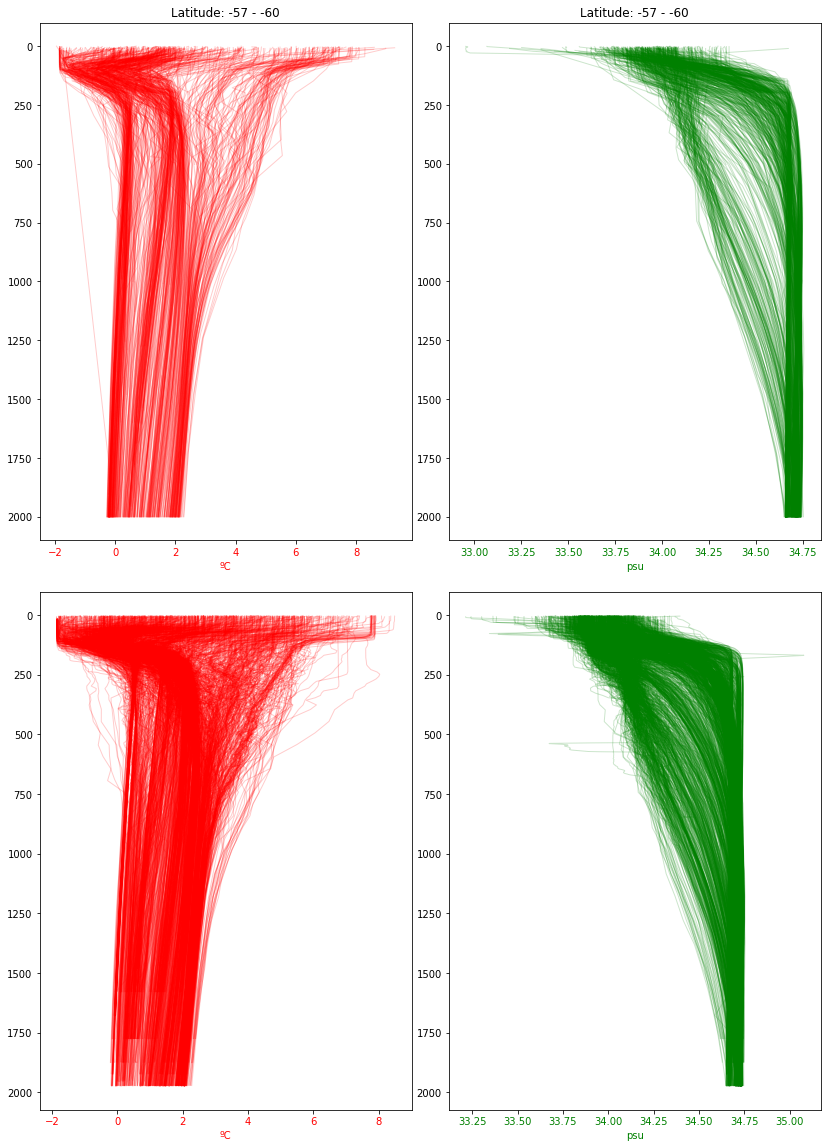

In [122]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -57 - -60')
ax1.set_title('Latitude: -57 - -60')
plt.show()

In [123]:
# check the circled region specifically?
i = 10
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-60
-63


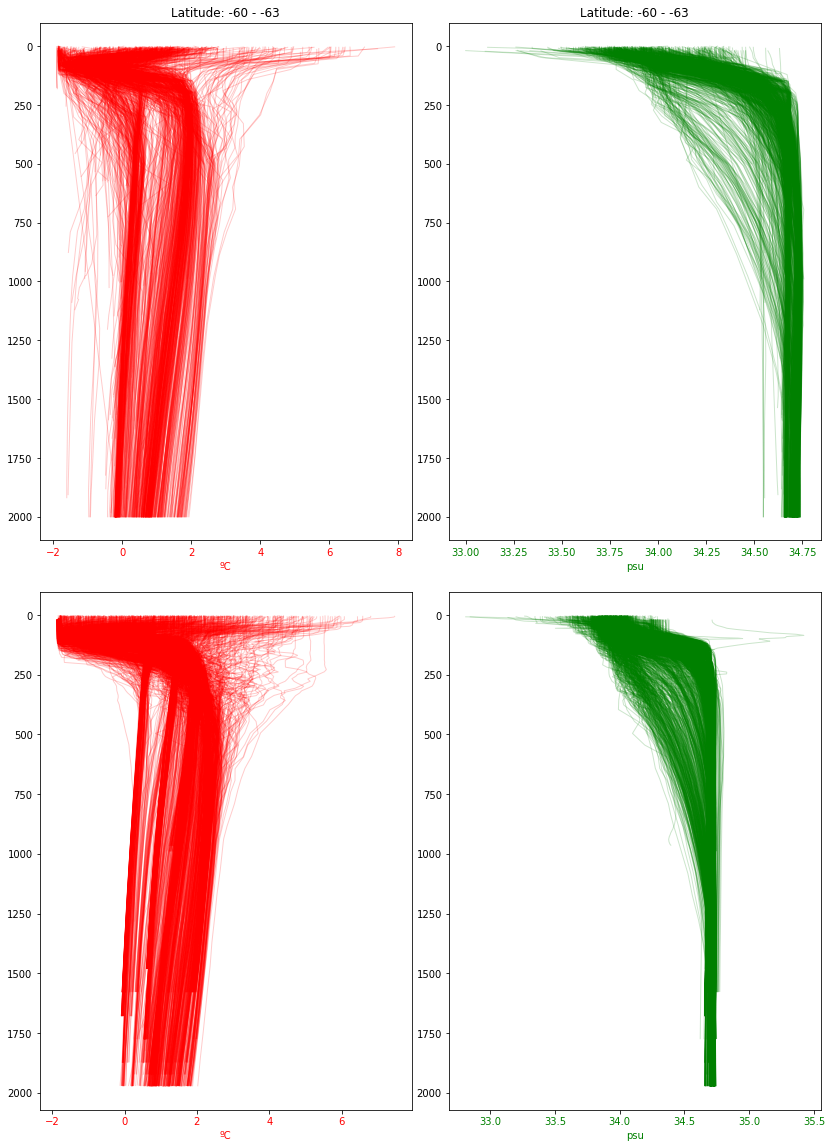

In [124]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -60 - -63')
ax1.set_title('Latitude: -60 - -63')
plt.show()

In [125]:
# check the circled region specifically?
i = 11
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-63
-66


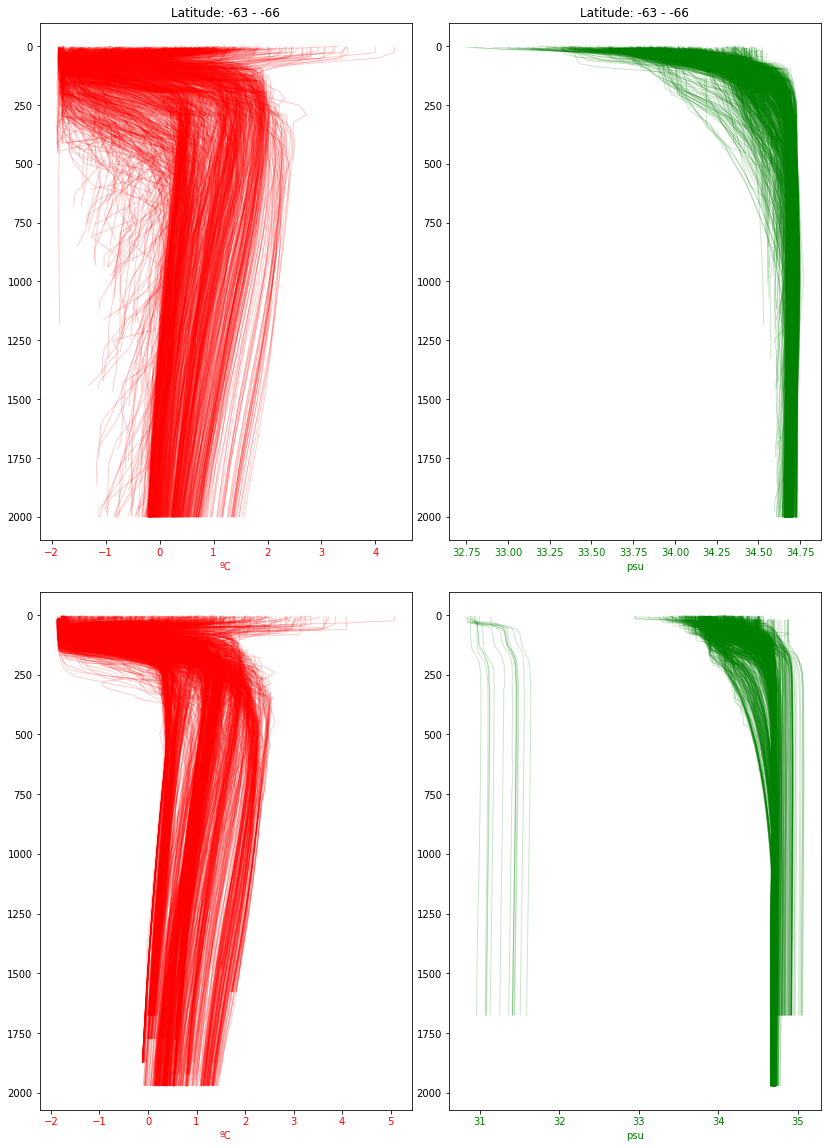

In [126]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -63 - -66')
ax1.set_title('Latitude: -63 - -66')
plt.show()

In [127]:
# check the circled region specifically?
i = 12
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-66
-69


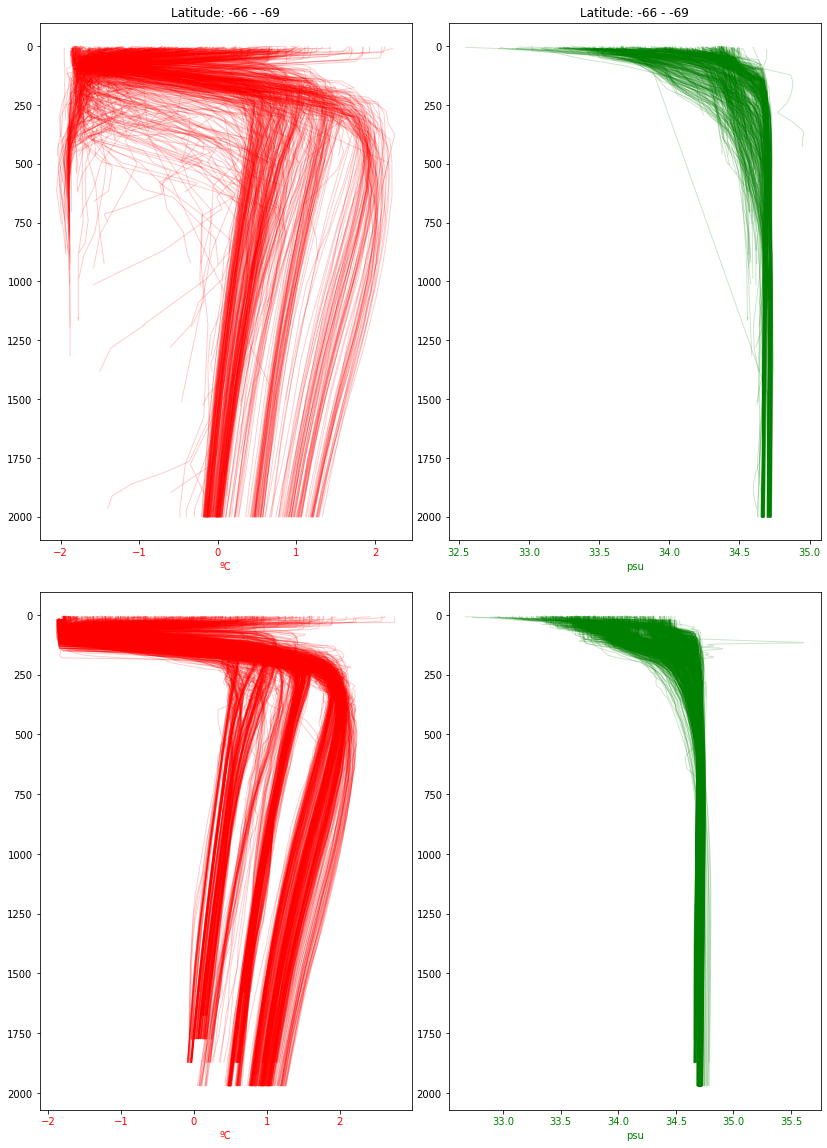

In [128]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -66 - -69')
ax1.set_title('Latitude: -66 - -69')
plt.show()

In [135]:
# check the circled region specifically?
i = 13
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-69
-72


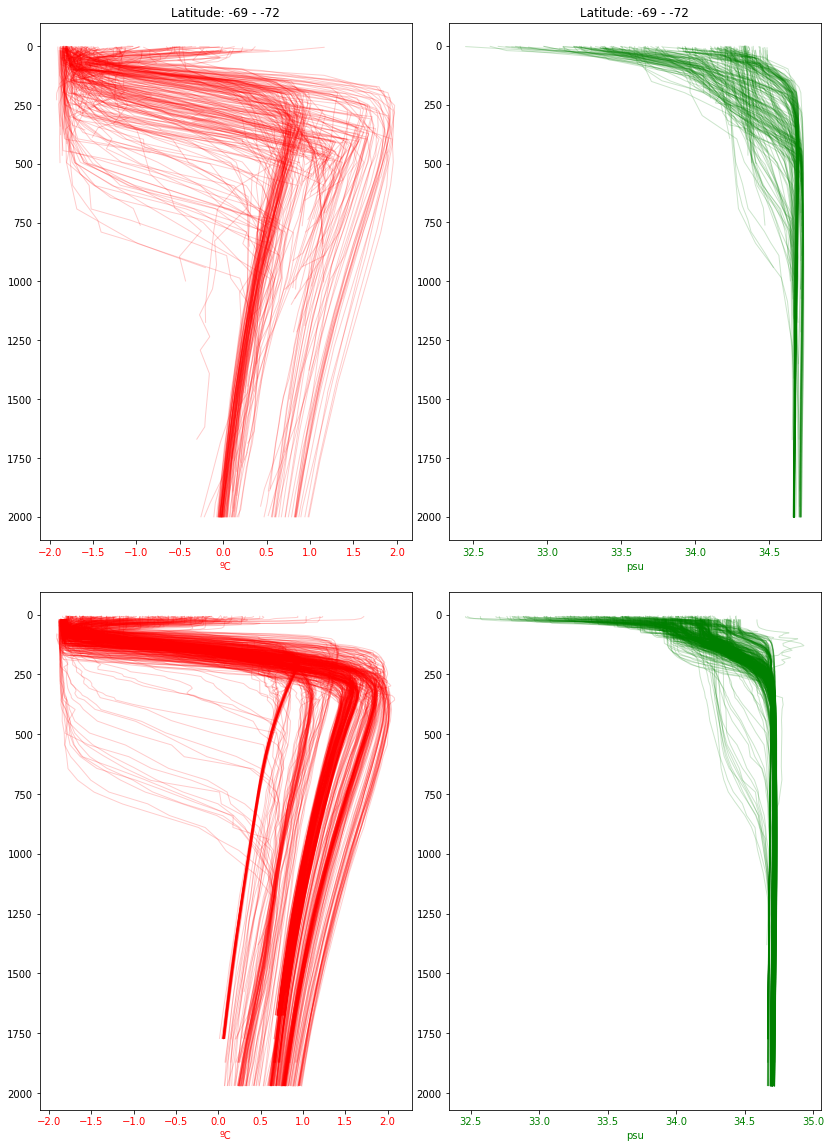

In [136]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -69 - -72')
ax1.set_title('Latitude: -69 - -72')
plt.show()

In [137]:
# check the circled region specifically?
i = 14
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-72
-75


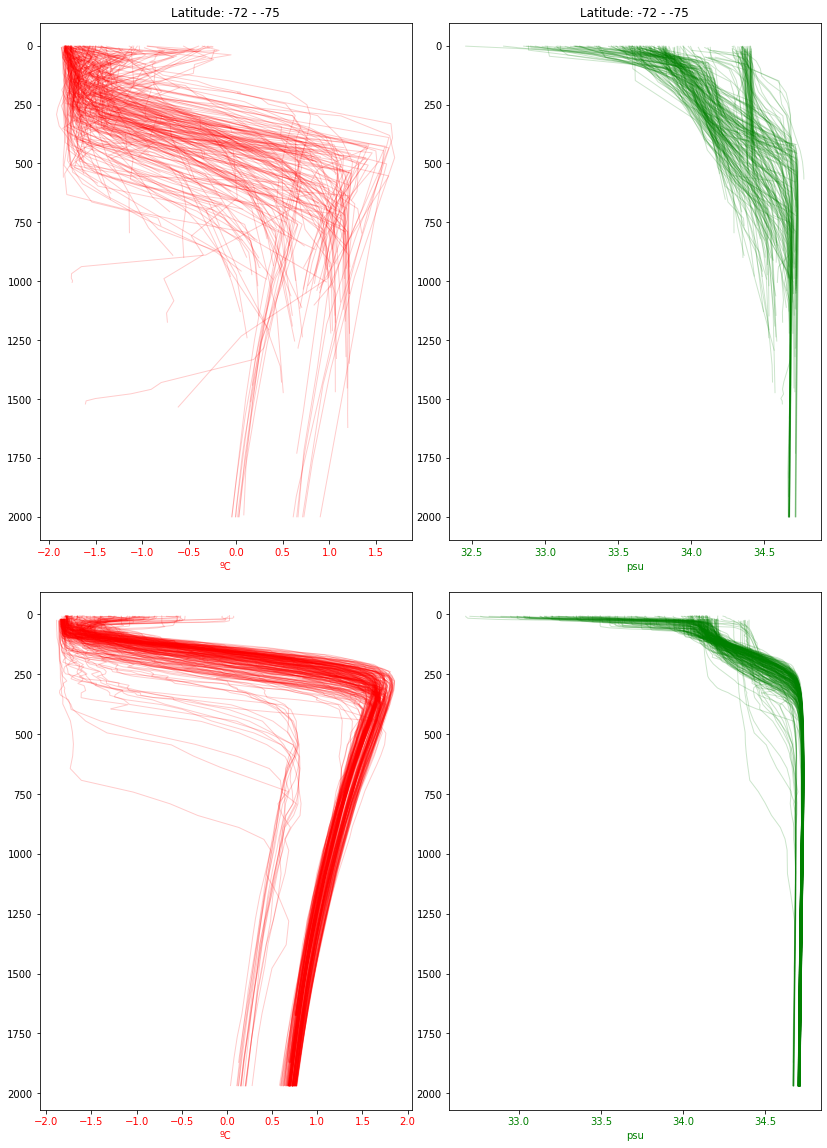

In [138]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -72 - -75')
ax1.set_title('Latitude: -72 - -75')
plt.show()

In [139]:
# check the circled region specifically?
i = 15
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES.where(GLODAP_TEMP_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_TEMP_PROFILES_i = GLODAP_TEMP_PROFILES_i.where(GLODAP_TEMP_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES.where(SOCCOM_TEMP_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_TEMP_PROFILES_i = SOCCOM_TEMP_PROFILES_i.where(SOCCOM_TEMP_PROFILES_i.lat>lat_bounds[i+1], drop = True)

GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES.where(GLODAP_SALT_PROFILES.latitude<lat_bounds[i], drop = True)
GLODAP_SALT_PROFILES_i = GLODAP_SALT_PROFILES_i.where(GLODAP_SALT_PROFILES_i.latitude>lat_bounds[i+1], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES.where(SOCCOM_SALT_PROFILES.lat<lat_bounds[i], drop = True)
SOCCOM_SALT_PROFILES_i = SOCCOM_SALT_PROFILES_i.where(SOCCOM_SALT_PROFILES_i.lat>lat_bounds[i+1], drop = True)

print(lat_bounds[i])
print(lat_bounds[i+1])

-75
-78


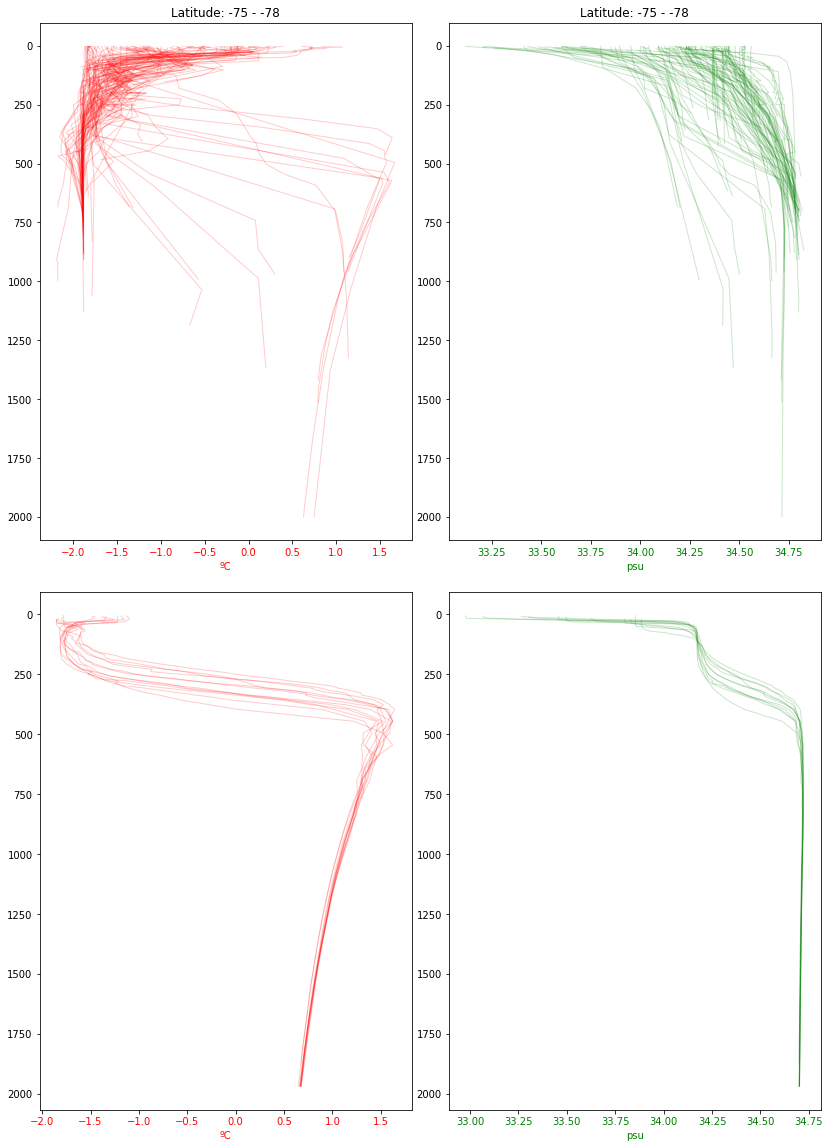

In [140]:
# fig = plt.figure(figsize=(7,10))
# ax = plt.subplot()
fig = plt.figure(figsize=[14, 20])
gs = gridspec.GridSpec(2,2)
ax, ax1, ax2, ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2]), plt.subplot(gs[3])
gs.update(wspace = 0.1, hspace = 0.1)
for i in range(len(GLODAP_TEMP_PROFILES_i.N_PROF)):
    ax.plot(GLODAP_TEMP_PROFILES_i[i,:].values, GLODAP_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(GLODAP_SALT_PROFILES_i.N_PROF)):
    ax1.plot(GLODAP_SALT_PROFILES_i[i,:].values, GLODAP_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_TEMP_PROFILES_i.N_PROF)):
    ax2.plot(SOCCOM_TEMP_PROFILES_i[i,:].values, SOCCOM_TEMP_PROFILES_i[i,:].depth.values, 'r', alpha = 0.2,linewidth = 1)
for i in range(len(SOCCOM_SALT_PROFILES_i.N_PROF)):
    ax3.plot(SOCCOM_SALT_PROFILES_i[i,:].values, SOCCOM_SALT_PROFILES_i[i,:].depth.values, 'g', alpha = 0.2,linewidth = 1)

    
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

ax.tick_params(axis='x', labelcolor='r')
ax.set_xlabel('ºC', color = 'r')
ax1.tick_params(axis='x', labelcolor='g')
ax1.set_xlabel('psu', color = 'g')
ax2.tick_params(axis='x', labelcolor='r')
ax2.set_xlabel('ºC', color = 'r')
ax3.tick_params(axis='x', labelcolor='g')
ax3.set_xlabel('psu', color = 'g')

ax.set_title('Latitude: -75 - -78')
ax1.set_title('Latitude: -75 - -78')
plt.show()